<a href="https://colab.research.google.com/github/ShardenduMishra22/Data-Science/blob/main/Stats_College_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

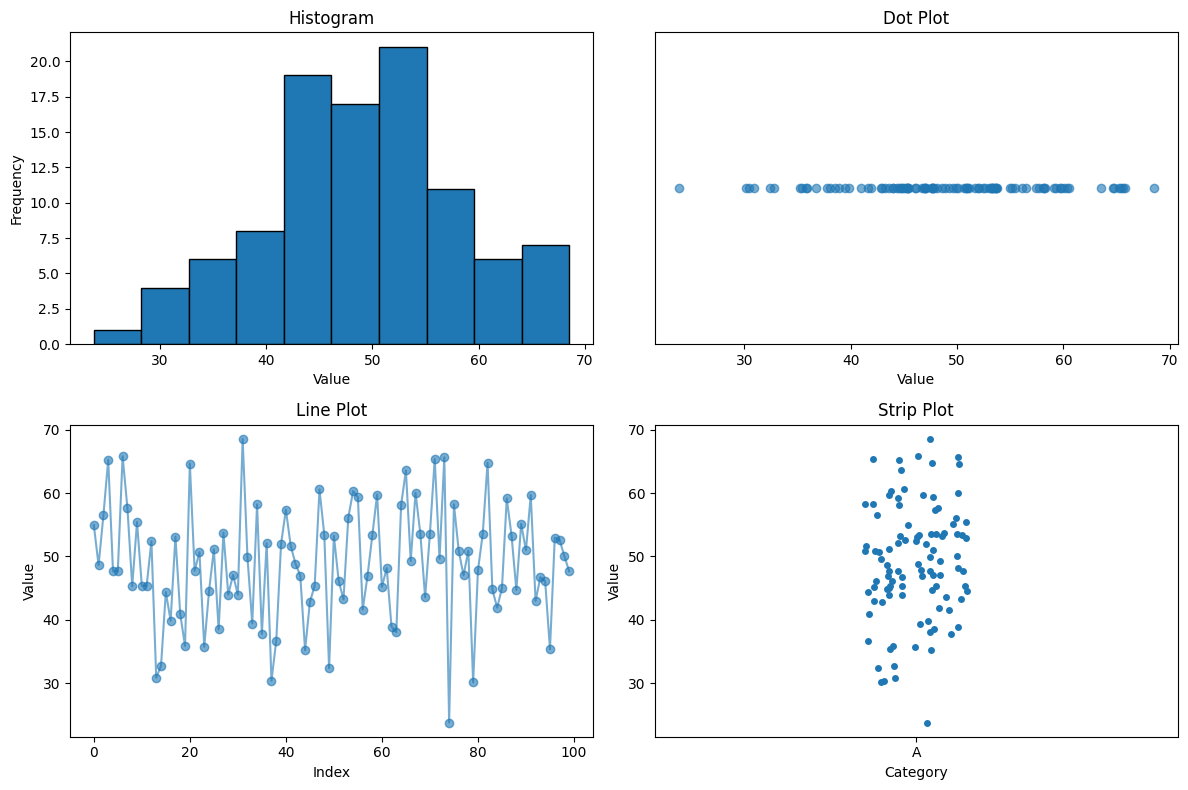

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Random data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

# Put into dataframe for seaborn
df = pd.DataFrame({"category": ["A"]*len(data), "value": data})

plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(data, bins=10, edgecolor="black")
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Dot Plot
plt.subplot(2, 2, 2)
plt.plot(data, [1]*len(data), "o", alpha=0.6)
plt.title("Dot Plot")
plt.yticks([])
plt.xlabel("Value")

# Line Plot
plt.subplot(2, 2, 3)
plt.plot(data, marker="o", linestyle="-", alpha=0.6)
plt.title("Line Plot")
plt.xlabel("Index")
plt.ylabel("Value")

# Strip Plot (same data)
plt.subplot(2, 2, 4)
sns.stripplot(x="category", y="value", data=df)
plt.title("Strip Plot")
plt.xlabel("Category")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

# Dataset Path

`kagglehub` caches datasets in a user-specific cache folder (`~/.cache/kagglehub/datasets/`) instead of the current directory or root. This is intentional:

* Avoids re-downloading the same dataset multiple times.
* Keeps your project directories clean.
* Allows multiple projects to share the same dataset without duplication.

If you want it somewhere specific, you need to **move it manually** after download or use `kagglehub.dataset_download(..., path="your/desired/path")` if the library supports a `path` argument.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("karanammithul/ipo-data-india-2010-2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ipo-data-india-2010-2025' dataset.
Path to dataset files: /kaggle/input/ipo-data-india-2010-2025


In [ ]:
import pandas as pd
import os

path = "/kaggle/input/ipo-data-india-2010-2025"

files = os.listdir(path) if os.path.exists(path) else []
print("Files:", files)

Files: ['Initial Public Offering.xlsx']


In [ ]:
file_path = os.path.join(path, "Initial Public Offering.xlsx")
df = pd.read_excel(file_path)

print(df)

          Date                                   IPO_Name  Issue_Size(crores)  \
0   2025-08-06                      M & B Engineering Ltd              650.00   
1   2025-08-06          Sri Lotus Developers & Realty Ltd              792.00   
2   2025-08-06  National Securities Depository Ltd (NSDL)             4011.60   
3   2025-08-05                        Aditya Infotech Ltd             1300.00   
4   2025-08-05                    Laxmi India Finance Ltd              254.26   
..         ...                                        ...                 ...   
556 2010-02-03        Infinite Computer Solutions Limited              189.80   
557 2010-01-06                           D B Corp Limited              384.22   
558 2010-01-05                  Godrej Properties Limited              468.85   
559 2010-01-04                         JSW Energy Limited             2700.00   
560 2010-01-11                 MBL Infrastructure Limited              102.60   

        QIB     HNI    RII 

In [ ]:
import pandas as pd

# Load the dataset
path = "/kaggle/input/ipo-data-india-2010-2025/Initial Public Offering.xlsx"
df = pd.read_excel(path)

# Keep only relevant columns
df = df[['Listing Gain', 'Current Gains', 'Total']].dropna()

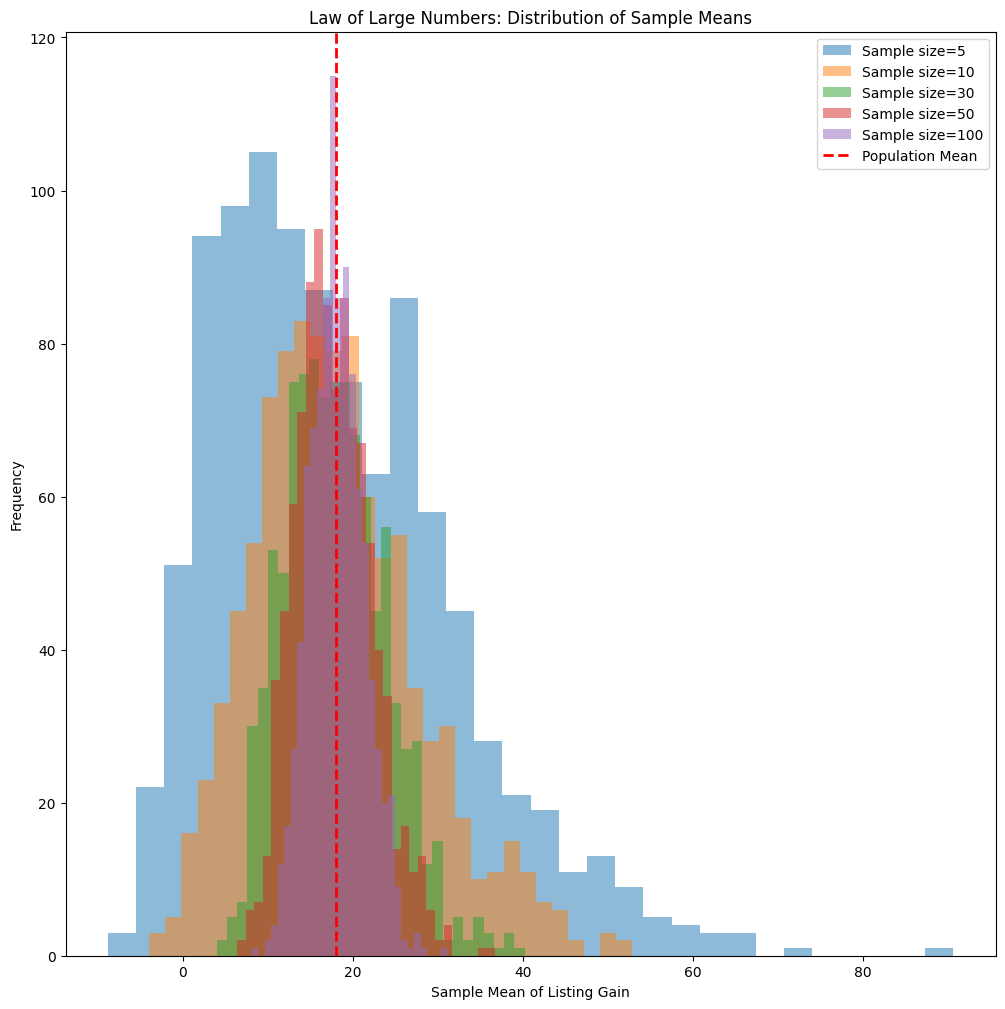

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

population = df['Listing Gain'].values
population_mean = np.mean(population)

sample_sizes = [5, 10, 30, 50, 100]
lln_means = []

for size in sample_sizes:
    means = []
    for _ in range(1000):
        sample = np.random.choice(population, size=size, replace=True)
        means.append(np.mean(sample))
    lln_means.append(means)


# Plot
plt.figure(figsize=(12,12))
for i, size in enumerate(sample_sizes):
  plt.hist(lln_means[i], bins=30, alpha=0.5, label=f'Sample size={size}')

plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title("Law of Large Numbers: Distribution of Sample Means")
plt.xlabel("Sample Mean of Listing Gain")
plt.ylabel("Frequency")
plt.legend()
plt.show()

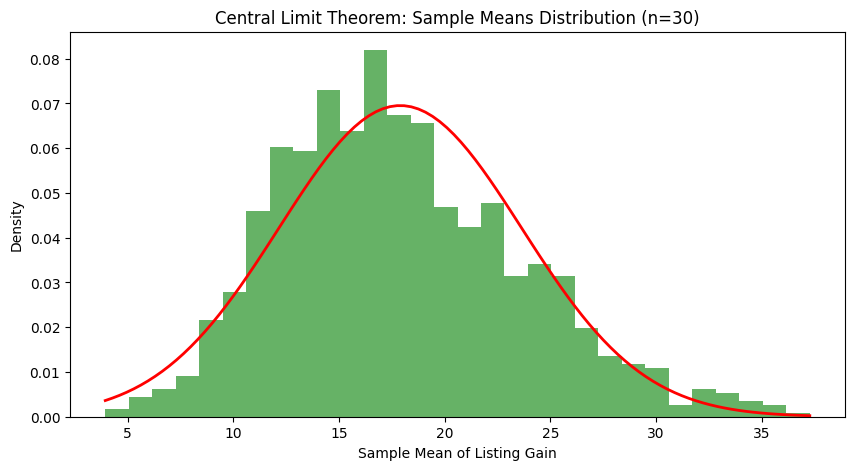

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

population = df['Listing Gain'].values

sample_size = 30
n_samples = 1000

sample_means = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))


plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')

mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title(f"Central Limit Theorem: Sample Means Distribution (n={sample_size})")
plt.xlabel("Sample Mean of Listing Gain")
plt.ylabel("Density")
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("clt_lln_observation.pdf") as pdf:
  # LLN plot
  plt.figure(figsize=(12,6))
  for i, size in enumerate(sample_sizes):
      plt.hist(lln_means[i], bins=30, alpha=0.5, label=f'Sample size={size}')
  plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
  plt.title("Law of Large Numbers")
  plt.xlabel("Sample Mean of Listing Gain")
  plt.ylabel("Frequency")
  plt.legend()
  pdf.savefig()
  plt.close()

  # CLT plot
  plt.figure(figsize=(10,5))
  plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')

  mu = np.mean(sample_means)
  sigma = np.std(sample_means)
  x = np.linspace(min(sample_means), max(sample_means), 100)
  plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

  plt.title(f"Central Limit Theorem: Sample Means Distribution (n={sample_size})")
  plt.xlabel("Sample Mean of Listing Gain")
  plt.ylabel("Density")
  pdf.savefig()
  plt.close()